In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy.optimize import fmin_l_bfgs_b
from pprint import pprint

In [ ]:
data_raw = pd.read_csv('data/event_13_cleaned_distributed_with_oblasts_injured.csv')

data_raw

##labeling ukraine as kyiv

data_raw.loc[(data_raw.oblast == 'Ukraine'),'oblast'] = 'Kyiv'


data_raw = data_raw.groupby(['oblast', 'event_date', 'day']).sum().reset_index()


##windowing
#data = data_raw
data = data_raw.loc[data_raw['day'] <= 45]
data = data.loc[data_raw['day'] != 0]
data['day'] = data['day']-1
data = data.loc[data['oblast'] != 'Crimea']

data = data.sort_values(['oblast', 'day'])
data






# Weighted centroid by population?

oblast_coords = {'Cherkasy':[49.4444, 32.0598], 'Chernihiv':[51.4982, 31.2893], 'Chernivtsi':[48.2917, 25.9352],
                 'Crimea':[45.3453, 34.4997], 'Dnipropetrovsk':[48.4647, 35.0462],
                 'Donetsk':[48.0159, 37.8028], 'Ivano-Frankivsk':[48.9226, 24.7111],
                 'Kharkiv':[49.9935, 36.2304], 'Kherson':[46.6354, 32.6169],
                 'Khmelnytskyi':[49.4230, 26.9871], 'Kirovohrad':[48.5079, 32.2623],
                 'Kyiv':[50.0530, 30.7667], 'Luhansk':[48.5740, 39.3078],
                 'Lutsk':[50.7472, 25.3254], 'Lviv':[49.8397, 24.0297],
                 'Mykolaiv':[46.9750, 31.9946], 'Odesa':[46.4846, 30.7326],
                 'Poltava':[49.5883, 34.5514], 'Rivne':[50.6199, 26.2516],
                 'Sumy':[50.9077, 34.7981], 'Ternopil':[49.5535, 25.5948],
                 'Uzhhorod':[48.6208, 22.2879], 'Vinnytsia':[49.2331, 28.4682],
                 'Zaporizhzhia':[47.8388, 35.1396], 'Zhytomyr':[50.2547, 28.6587],
                'Ukraine': [0,0]}


## Defining Distance function
def Wij(i,j,c, d):
    ### i and j are strings oblast names
    if i == j:
        return 1
    if i == 'Ukraine' or j == 'Ukraine':
        dist = 0
    else:
        dist = np.sqrt( (oblast_coords[i][0] - oblast_coords[j][0])**2 + (oblast_coords[i][1] - oblast_coords[j][1])**2)
    return d/(dist + 1)**c

oblasts = data['oblast'].unique()
oblasts


population_oblast_dict = {
                            'Cherkasy':1246166, 
                            'Chernihiv':1047023, 
                            'Chernivtsi':910001,
                            'Crimea':1963770, 
                            'Dnipropetrovsk': 3258705,
                            'Donetsk': 4387702,
                            'Ivano-Frankivsk': 1382721,
                            'Kharkiv': 2720342,
                            'Kherson': 1063803,
                            'Khmelnytskyi': 1296103, 
                            'Kirovohrad': 974724,
                            'Kyiv': 2900920 + 1731673, 
                            'Luhansk': 2263676,
                            'Lutsk': 1042855,  ## Only a city, oblast Volyn city pop 217,197
                            'Lviv': 2535476,
                            'Mykolaiv': 1159634,
                            'Odesa': 2387282,
                            'Poltava': 1440684,
                            'Rivne': 1162049,
                            'Sumy': 1115051,
                            'Ternopil': 1066523,
                            'Uzhhorod': 1259497, ## Only a city, oblast Zakarpattia city pop 115,542
                            'Vinnytsia': 1604270,
                            'Zaporizhzhia':1755663, 
                            'Zhytomyr': 1249225,
                            'Ukraine': 0}
    

#### Oblast Sevastopol 381,685 not present



## get total population
total_pop = 0
for ob in population_oblast_dict.keys():
    total_pop += population_oblast_dict[ob]

population_oblast_dict['Ukraine'] = total_pop

population_oblast_dict

EU_vote = {'Cherkasy':0.5461, 
                            'Chernihiv':0.4481, 
                            'Chernivtsi':0.5672,
                            'Crimea':0, 
                            'Dnipropetrovsk': 0.4472,
                            'Donetsk': 0.3615,
                            'Ivano-Frankivsk': 0.6513,
                            'Kharkiv': 0.3528,
                            'Kherson': 0.4871,
                            'Khmelnytskyi': 0.5626, 
                            'Kirovohrad': 0.5096,
                            'Kyiv': 0.6410, 
                            'Luhansk': 0.3317,
                            'Lutsk': 0.5241,  ## Only a city, oblast Volyn city pop 217,197
                            'Lviv': 0.6992,
                            'Mykolaiv': 0.4597,
                            'Odesa': 0.4178,
                            'Poltava': 0.5455,
                            'Rivne': 0.5546,
                            'Sumy': 0.5541,
                            'Ternopil': 0.6063,
                            'Uzhhorod': 0.622, ## Only a city, oblast Zakarpattia city pop 115,542
                            'Vinnytsia': 0.6732,
                            'Zaporizhzhia':0.3815, 
                            'Zhytomyr': 0.5864,
            }

Ukraine_votes = 0.5470

eu_vote_scaler = {}

for ob in oblasts:
    
    eu_vote_scaler[ob] = EU_vote[ob]/Ukraine_votes

eu_vote_scaler

pop_rat = {}

for ob in oblasts:
    pop_rat[ob] = population_oblast_dict[ob]/population_oblast_dict['Ukraine']
pop_rat





## exclusion:
data = data[~data.oblast.isin(['Chernihiv',
                               'Donetsk',
                               'Dnipropetrovsk',
                               'Kharkiv',
                               'Kherson',
                               'Kirovohrad',
                               'Poltava',
                               'Sumy',
                               'Zhytomyr'
                                ])]

data['Number of civilians arrested'] = data['Number of civilians arrested']+1
data['Number of civilians injured'] = data['Number of civilians injured']+1
data['Number of civilians arrested'] = (data['Number of civilians arrested']  - data['Number of civilians arrested'].min())/(data['Number of civilians arrested'].max()-data['Number of civilians arrested'].min()) + 1
data['Number of civilians injured'] = (data['Number of civilians injured'] - data['Number of civilians injured'].min())/(data['Number of civilians injured'].max()-data['Number of civilians injured'].min()) + 1
data


N0 = 3.25

In [ ]:
oblasts = data['oblast'].unique()


days = list(data['day'].unique())
data_array = np.zeros((len(days),len(oblasts)))

for i in range(0, len(oblasts)):
    data_array[:, i] = np.array(data.loc[data['oblast'] == oblasts[i]]['Number of events'])

data_array.shape

(45, 15)

In [ ]:
class Hawkes():
    def __init__(self, spike_times, initial_state, hk_func, loss_func):
        self.spike_times = spike_times
        self.initial_state = initial_state
        self.Hawkes = hk_func
        self.loss = loss_func

In [ ]:
def Nevents(data_arr, spike_times, Nsec, Tex, c, d, p):
    N_array = np.zeros(data_arr.shape)
    
    N_array[0,:] = data_arr[0,:]
    
    W_matrix = np.zeros((len(oblasts), len(oblasts)))
    for i in range(0,len(oblasts)):
        for j in range(0, len(oblasts)):
            if i !=j:
                W_matrix[i,j] = Wij(oblasts[i],oblasts[j],c, d)
    
    pop_arr = np.array([pop_rat[oblasts[i]] for i in range(0, len(oblasts))])
    eu_vote_arr = np.array([eu_vote_scaler[oblasts[i]] for i in range(0, len(oblasts))])
    
    popvote_multiplied = np.multiply(pop_arr, eu_vote_arr)
    
    injured = np.zeros(data_arr.shape)
    for i in range(0,len(oblasts)):
        dt_injr = np.array(data[data['oblast'] == oblasts[i]]['Number of civilians injured'].tolist())
        injured[:,i] = dt_injr
    injured = injured**p
    
    kernel = np.zeros(data_arr.shape[0])
    for i in range(1,len(kernel)):
        for j in range(0, len(spike_times)):
            if i>spike_times[j]:
                kernel[i] += np.exp(-(i-spike_times[j])/Tex)
    kernel = Nsec*kernel

#     print('pop', popvote_multiplied)
    # print('popker', N0 +  popvote_multiplied*kernel[1])
    for d in range(1, data_arr.shape[0]):
        # N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[i]) #+ popvote_multiplied*np.dot(N_array[d,:], W_matrix))
        N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[d]+ popvote_multiplied*np.dot(N_array[d-1,:], W_matrix))

    return N_array

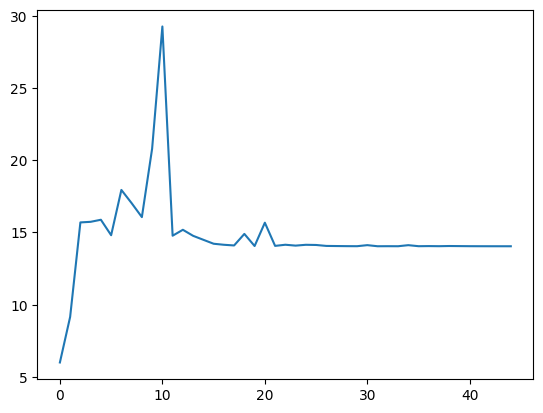

In [ ]:

spike_times = np.array([0, 1, 5])

Nsec = 100
Tex = 0.8
c = 1
d = 5
p = 1
blind_run = Nevents(data_array, spike_times, Nsec, Tex, c, d, p)
# print('run', blind_run[:,])
plt.plot(days, blind_run[:,4])


In [ ]:
def loglike(data_arr, Nexp_func, spike_times, Nsec, Tex, c, d, p):
    
    # print(data_arr)
    N_expected = Nexp_func(data_arr, spike_times, Nsec, Tex, c, d, p)
    # print(data_arr[0,:]- N_expected[0,:])
    
    negative_lg_liklihood = 0
    
    for i in range(0,N_expected.shape[0]):
        for j in range(0,N_expected.shape[1]):
            if N_expected[i,j] != 0:
                negative_lg_liklihood += N_expected[i,j] - data_arr[i,j]*np.log(N_expected[i,j])
    return(negative_lg_liklihood)
def loglike_minimize(param):
    return loglike(data_array, Nevents, spike_times, param[0], param[1], param[2], param[3], param[4])

In [ ]:
loglike(data_array, Nevents, spike_times, Nsec, Tex, c, d, p)

-517.5343682815029

In [ ]:
def square_diff(data_arr, Nexp_func, spike_times, Nsec, Tex, c, d, p):

    N_expected = Nexp_func(data_arr, spike_times, Nsec, Tex, c, d, p)

    diff = (N_expected - data_array)**2
    
    return np.sum(diff)
square_diff(data_array, Nevents, spike_times, Nsec, Tex, c, d, p)
def square_diff_minimize(param):
    return square_diff(data_array, Nevents, spike_times, param[0], param[1], param[2], param[3], param[4])

# Getting Spiketimes:

In [ ]:
num_events = data.groupby(['day']).sum().reset_index()['Number of events'].to_list()

C:\Users\yassin\AppData\Local\Temp\ipykernel_16780\2906406443.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_events = data.groupby(['day']).sum().reset_index()['Number of events'].to_list()


## on day difference:

In [258]:
spiketimes1day = []
for i in range(1, len(num_events)):
    if num_events[i] > num_events[i-1]:
        spiketimes1day = spiketimes1day + [i]
spiketimes1day

[1, 3, 5, 6, 10, 11, 17, 18, 20, 24, 26, 28, 29, 31, 34, 35, 38]

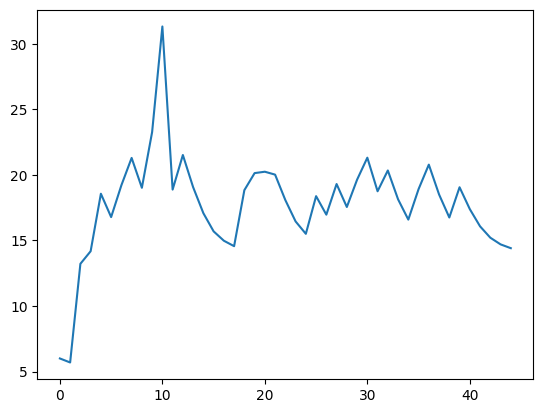

In [268]:


Nsec = 100
Tex = 0.8
c = 1
d = 5
p = 1
blind_run = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
# print('run', blind_run[:,])
plt.plot(days, blind_run[:,4])

In [260]:

def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes1day, param[0], param[1], param[2], param[3], param[4])

In [261]:

Nsec = 100
Tex = 0.8
c = 1
d = 0
p = 1
param = [Nsec, Tex, c, d, p]

loglike_minimize(param)
N_sec_bound, T_ex_bound, A_bound, c_bound, d_bound, tsbound, p_bound = (1, 200), (0, 300), (0,1), (0, 10), (0,100), (1,10), (0,10)


bd_array = np.array([N_sec_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(loglike_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
Sol = sol[0]
loglike_minimize(param)

C:\Users\yassin\AppData\Local\Temp\ipykernel_16780\3013314029.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  kernel[i] += np.exp(-(i-spike_times[j])/Tex)


-986.2434367540691

In [262]:
Sol

array([99.96769595,  0.52739112,  0.14634559,  0.4780748 ,  3.35063812])

In [266]:
# N0 = 3.25

# [Nsec, Tex , c, d, p] = sol[0]



# #print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
# Nexp_all = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
# for ob in oblasts:
#     oblast_index = np.where(oblasts == ob)[0][0]
    
#     Nexp_ob = Nexp_all[:, oblast_index]

#     days = list(data['day'].unique())

#     plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
#     plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
#     plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
#                                                                   '2013-12-16', '2013-12-26', '2014-01-04' 
#                                                                     ], rotation = 90)
#     plt.legend()
#     plt.title(ob)
    
#     # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
# #     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
#     plt.show()

# middle Spiketime:



In [267]:
spiketimes3day = []
for i in range(1, len(num_events)-1):
    if num_events[i] > num_events[i-1] and num_events[i] > num_events[i+1] :
        spiketimes3day = spiketimes3day + [i]
spiketimes3day

[1, 3, 6, 11, 18, 20, 24, 26, 29, 31, 35, 38]

In [270]:

def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes3day, param[0], param[1], param[2], param[3], param[4])

Nsec = 100
Tex = 0.8
c = 1
d = 0
p = 1
param = [Nsec, Tex, c, d, p]

loglike_minimize(param)
N_sec_bound, T_ex_bound, A_bound, c_bound, d_bound, tsbound, p_bound = (1, 200), (0, 300), (0,1), (0, 10), (0,100), (1,10), (0,10)


bd_array = np.array([N_sec_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(loglike_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
Sol = sol[0]
print(Sol, loglike_minimize(param))

C:\Users\yassin\AppData\Local\Temp\ipykernel_16780\3013314029.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  kernel[i] += np.exp(-(i-spike_times[j])/Tex)


[9.99630817e+01 1.16484251e-03 1.48882454e-01 6.18724496e-01
 3.24488648e+00] -917.7541368738177


In [272]:
# N0 = 3.25

# [Nsec, Tex , c, d, p] = sol[0]



# #print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
# Nexp_all = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
# for ob in oblasts:
#     oblast_index = np.where(oblasts == ob)[0][0]
    
#     Nexp_ob = Nexp_all[:, oblast_index]

#     days = list(data['day'].unique())

#     plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
#     plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
#     plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
#                                                                   '2013-12-16', '2013-12-26', '2014-01-04' 
#                                                                     ], rotation = 90)
#     plt.legend()
#     plt.title(ob)
    
#     # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
# #     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
#     plt.show()

# Moving Magnitude:

In [376]:
def Nevents(data_arr, spike_times, Nsec, t,  Tex, c, d, p):
    N_array = np.zeros(data_arr.shape)
    
    N_array[0,:] = data_arr[0,:]
    
    W_matrix = np.zeros((len(oblasts), len(oblasts)))
    for i in range(0,len(oblasts)):
        for j in range(0, len(oblasts)):
            if i !=j:
                W_matrix[i,j] = Wij(oblasts[i],oblasts[j],c, d)
    
    pop_arr = np.array([pop_rat[oblasts[i]] for i in range(0, len(oblasts))])
    eu_vote_arr = np.array([eu_vote_scaler[oblasts[i]] for i in range(0, len(oblasts))])
    
    popvote_multiplied = np.multiply(pop_arr, eu_vote_arr)
    
    injured = np.zeros(data_arr.shape)
    for i in range(0,len(oblasts)):
        dt_injr = np.array(data[data['oblast'] == oblasts[i]]['Number of civilians injured'].tolist())
        injured[:,i] = dt_injr
    injured = injured**p
    
    kernel = np.zeros(data_arr.shape[0])
    for i in range(1,len(kernel)):
        for j in range(0, len(spike_times)):
            if i>spike_times[j]:
                kernel[i] += np.exp(-(i-spike_times[j])/Tex)
                kernel[i] = Nsec*np.exp(-(i-t)**2)*kernel[i]

    for d in range(1, data_arr.shape[0]):
        # N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[i]) #+ popvote_multiplied*np.dot(N_array[d,:], W_matrix))
        N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[d]+ popvote_multiplied*np.dot(N_array[d-1,:], W_matrix))

    return N_array

In [391]:
def loglike(data_arr, Nexp_func, spike_times, Nsec,t, Tex, c, d, p):
    
    # print(data_arr)
    N_expected = Nexp_func(data_arr, spike_times, Nsec, t, Tex, c, d, p)
    # print(data_arr[0,:]- N_expected[0,:])
    
    negative_lg_liklihood = 0
    
    for i in range(0,N_expected.shape[0]):
        for j in range(0,N_expected.shape[1]):
            if N_expected[i,j] != 0:
                negative_lg_liklihood += N_expected[i,j] - data_arr[i,j]*np.log(N_expected[i,j])
    return negative_lg_liklihood
def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes1day, param[0], param[1], param[2], param[3], param[4], param[5])

In [392]:
loglike_minimize(param)

ZeroDivisionError: division by zero

In [393]:
Nsec_lst = [i for i in range(0,200)]
t_lst = [i for i in range(0,45)]
Tex_lst = [i for i in range(0,300)]
c_lst = [i for i in range(0,10)]
d_lst = [i for i in range(0,100)]
p_lst = [i for i in range(0,10)]
N_sec_bound, t_bound, T_ex_bound, c_bound, d_bound, p_bound = (0, 200), (0,45), (0, 300), (0, 10), (0,100), (0,10)

lggmin = 1000

for Nsec in Nsec_lst:
    for t in t_lst:
        for Tex in Tex_lst:
            for c in c_lst:
                for d in d_lst:
                    for p in p_lst:
                        param = [Nsec, t, Tex, c, d, p]
                        bd_array = np.array([N_sec_bound, t_bound, T_ex_bound, c_bound, d_bound, p_bound])

                        sol = fmin_l_bfgs_b(loglike_minimize,
                                             param,
                                             approx_grad=True,
                                             bounds=bd_array,
                                             epsilon=1e-08,
                                             maxfun=4000)

                        if loglike_minimize(sol[0])< lggmin:
                            lggmin = loglike_minimize(sol[0])
                            Sol = loglike_minimize(sol[0])

print(Sol, loglike_minimize(Sol))

C:\Users\yassin\AppData\Local\Temp\ipykernel_16780\3491237458.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  kernel[i] += np.exp(-(i-spike_times[j])/Tex)


KeyboardInterrupt: 

In [366]:
# N0 = 3.25

# [Nsec, t, Tex , c, d, p, v] = sol[0]



# #print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
# Nexp_all = Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p, v)
# for ob in oblasts:
#     oblast_index = np.where(oblasts == ob)[0][0]
    
#     Nexp_ob = Nexp_all[:, oblast_index]

#     days = list(data['day'].unique())

#     plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
#     plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
#     plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
#                                                                   '2013-12-16', '2013-12-26', '2014-01-04' 
#                                                                     ], rotation = 90)
#     plt.legend()
#     plt.title(ob)
    
#     # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
# #     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
#     plt.show()

# dist:

In [367]:
def Nevents(data_arr, spike_times, Nsec, Tex, c, d, p):
    N_array = np.zeros(data_arr.shape)
    
    N_array[0,:] = data_arr[0,:]
    
    W_matrix = np.zeros((len(oblasts), len(oblasts)))
    for i in range(0,len(oblasts)):
        for j in range(0, len(oblasts)):
            if i !=j:
                W_matrix[i,j] = Wij(oblasts[i],oblasts[j],c, d)
    
    pop_arr = np.array([pop_rat[oblasts[i]] for i in range(0, len(oblasts))])
    eu_vote_arr = np.array([eu_vote_scaler[oblasts[i]] for i in range(0, len(oblasts))])
    
    popvote_multiplied = np.multiply(pop_arr, eu_vote_arr)
    
    injured = np.zeros(data_arr.shape)
    for i in range(0,len(oblasts)):
        dt_injr = np.array(data[data['oblast'] == oblasts[i]]['Number of civilians injured'].tolist())
        injured[:,i] = dt_injr
    injured = injured**p
    
    kernel = np.zeros(data_arr.shape[0])
    for i in range(1,len(kernel)):
        for j in range(0, len(spike_times)):
            if i>spike_times[j]:
                kernel[i] += np.exp(-(i-spike_times[j])/Tex)
    kernel = Nsec*kernel

#     print('pop', popvote_multiplied)
    # print('popker', N0 +  popvote_multiplied*kernel[1])
    for d in range(1, data_arr.shape[0]):
        # N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[i]) #+ popvote_multiplied*np.dot(N_array[d,:], W_matrix))
        N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[d]+ popvote_multiplied*np.dot(N_array[d-1,:], W_matrix))

    return N_array

In [369]:
def square_diff(data_arr, Nexp_func, spike_times, Nsec, Tex, c, d, p):

    N_expected = Nexp_func(data_arr, spike_times, Nsec, Tex, c, d, p)

    diff = (N_expected - data_array)**2
    
    return np.sum(diff)

def square_diff_minimize(param):
    return square_diff(data_array, Nevents, spike_times, param[0], param[1], param[2], param[3], param[4])

square_diff(data_array, Nevents, spiketimes1day, Nsec, Tex, c, d, p)

11670.704001846972

In [372]:

Nsec = 100
Tex = 0.8
c = 1
d = 0
p = 1
param = [Nsec, Tex, c, d, p]

N_sec_bound, T_ex_bound, A_bound, c_bound, d_bound, tsbound, p_bound = (1, 200), (0, 300), (0,1), (0, 10), (0,100), (1,10), (0,10)


bd_array = np.array([N_sec_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(square_diff_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
print(sol[0], square_diff_minimize(param))

[43.41912548 17.73794645  0.          0.          1.64580253] 15361.977039694073


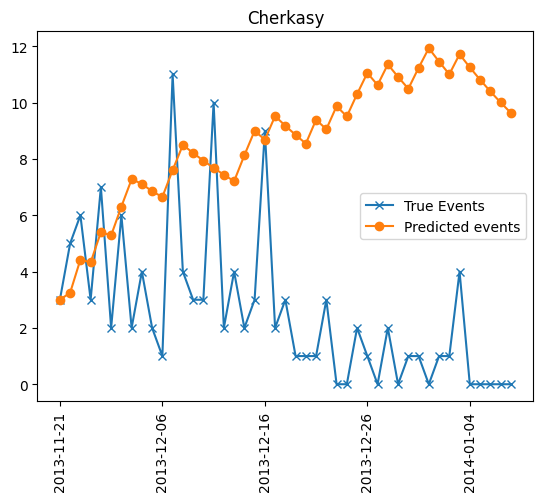

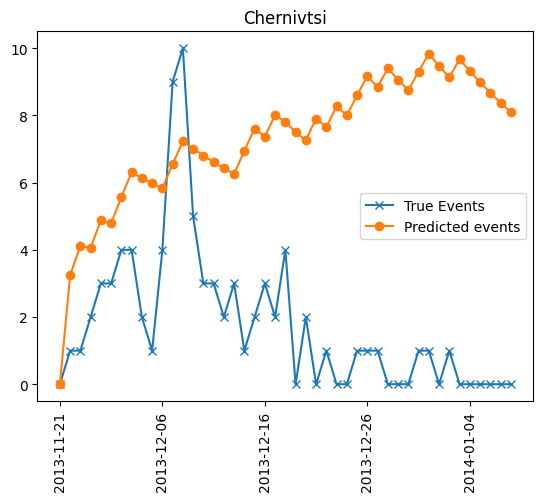

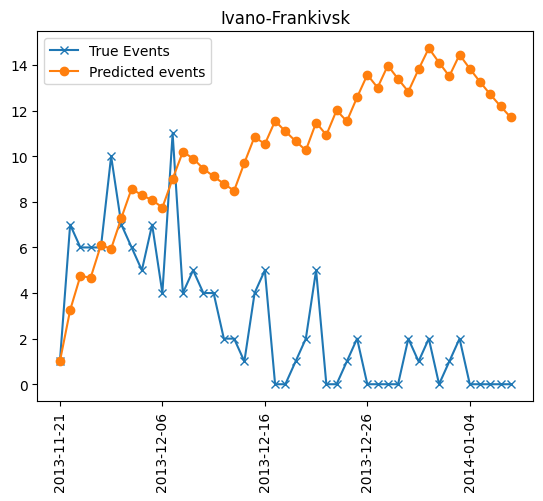

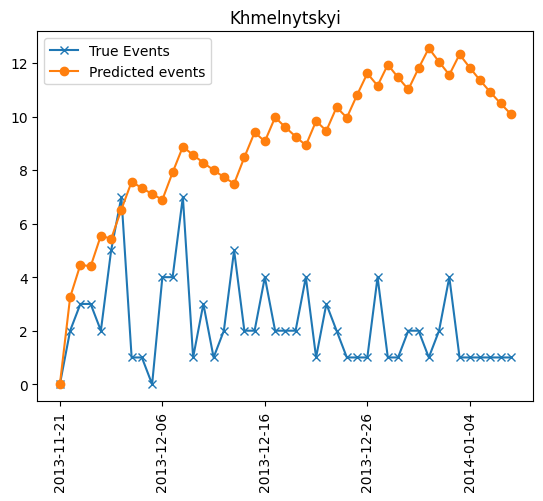

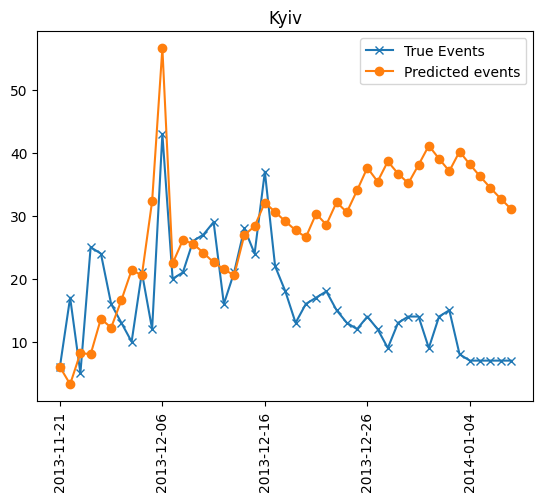

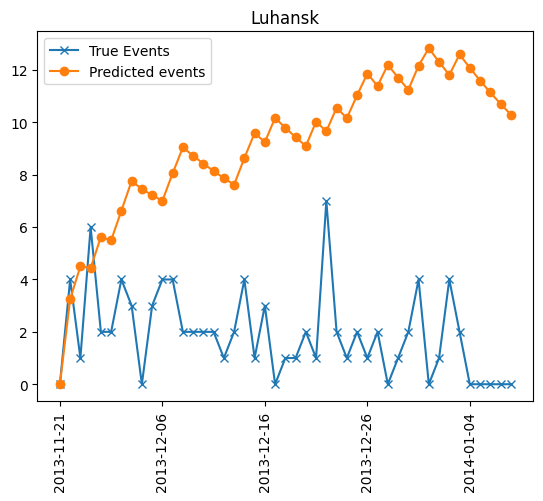

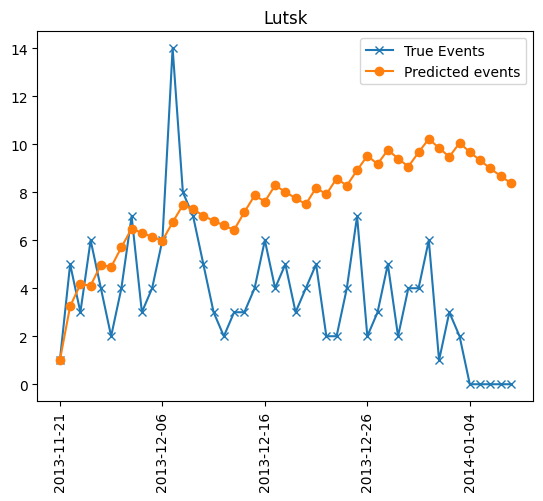

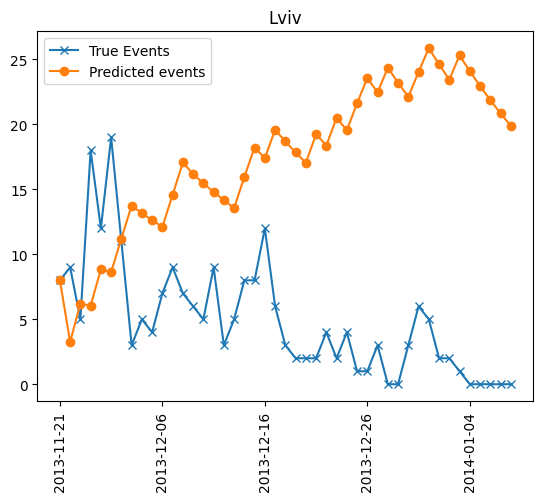

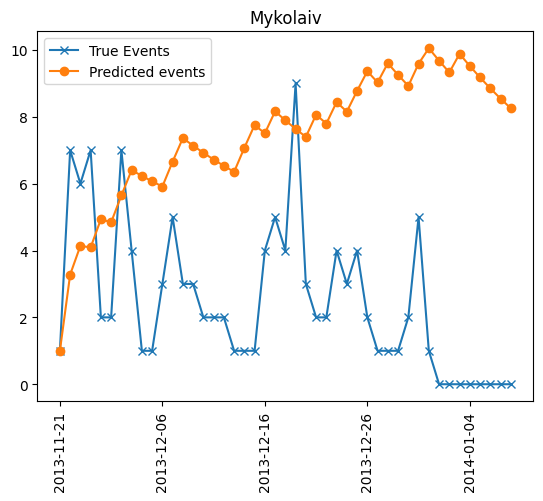

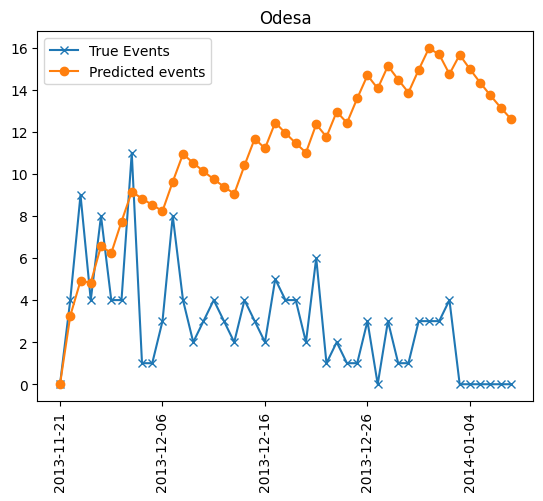

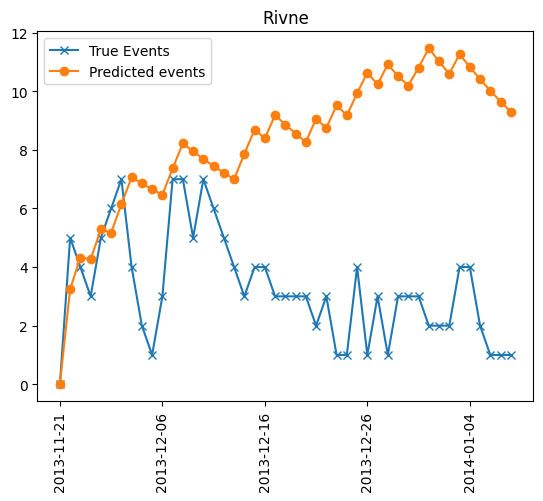

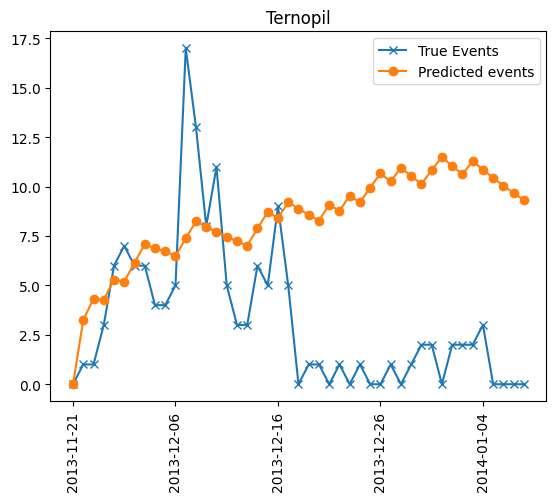

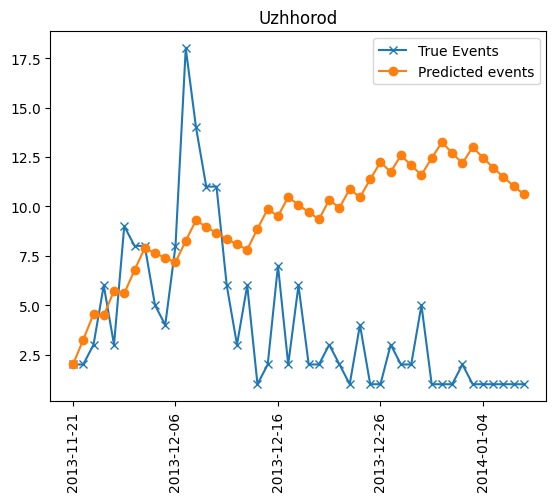

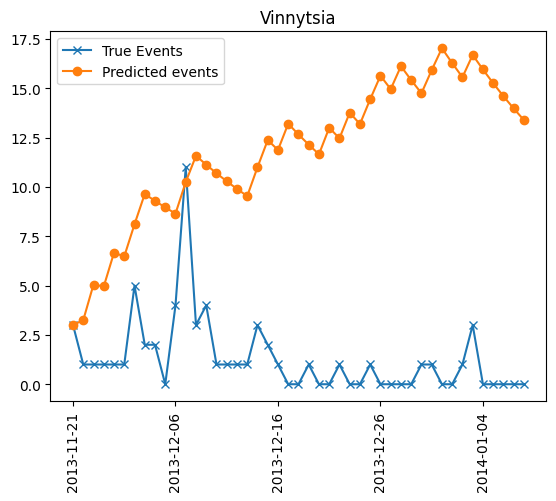

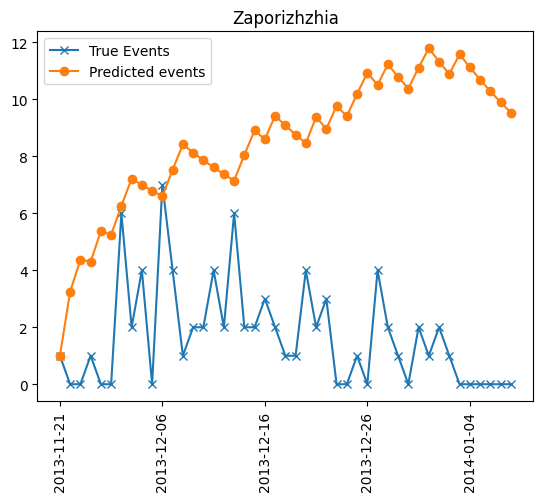

In [375]:
N0 = 3.25

[Nsec,Tex , c, d, p] = sol[0]



#print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
Nexp_all = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
for ob in oblasts:
    oblast_index = np.where(oblasts == ob)[0][0]
    
    Nexp_ob = Nexp_all[:, oblast_index]

    days = list(data['day'].unique())

    plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
    plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
    plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
                                                                  '2013-12-16', '2013-12-26', '2014-01-04' 
                                                                    ], rotation = 90)
    plt.legend()
    plt.title(ob)
    
    # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
#     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
    plt.show()